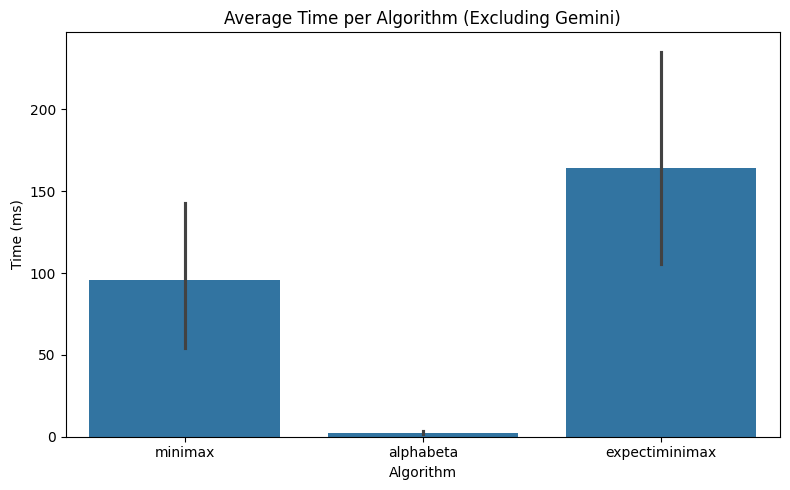

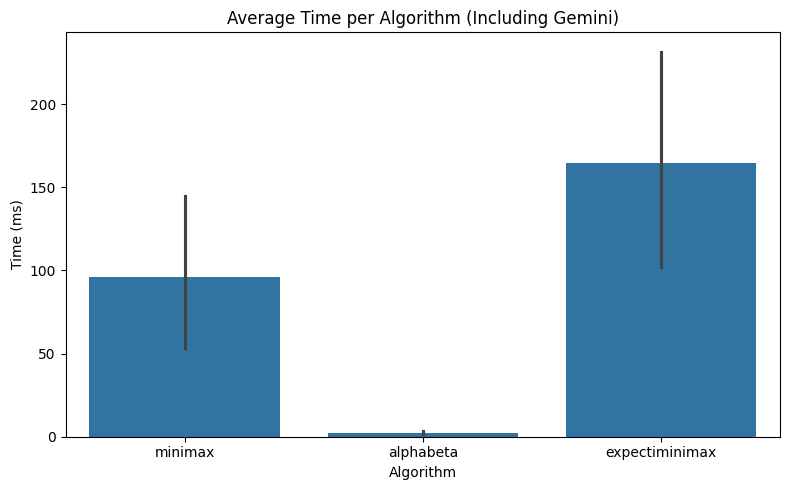

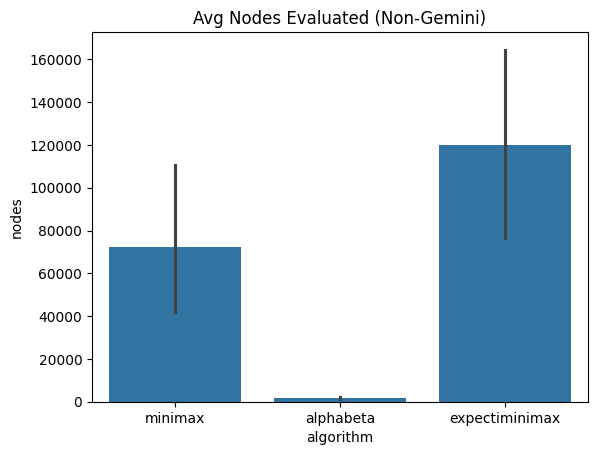

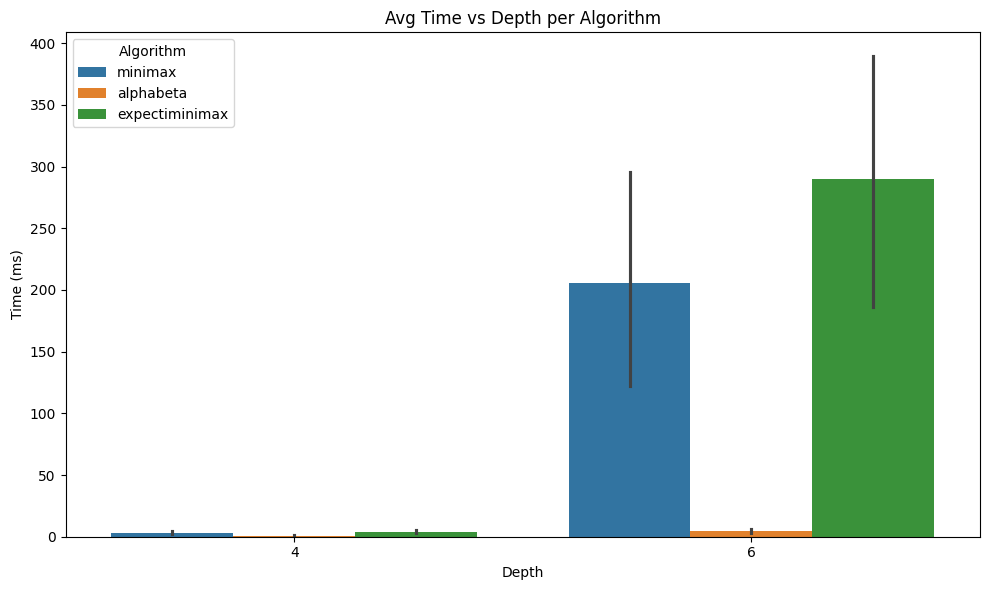

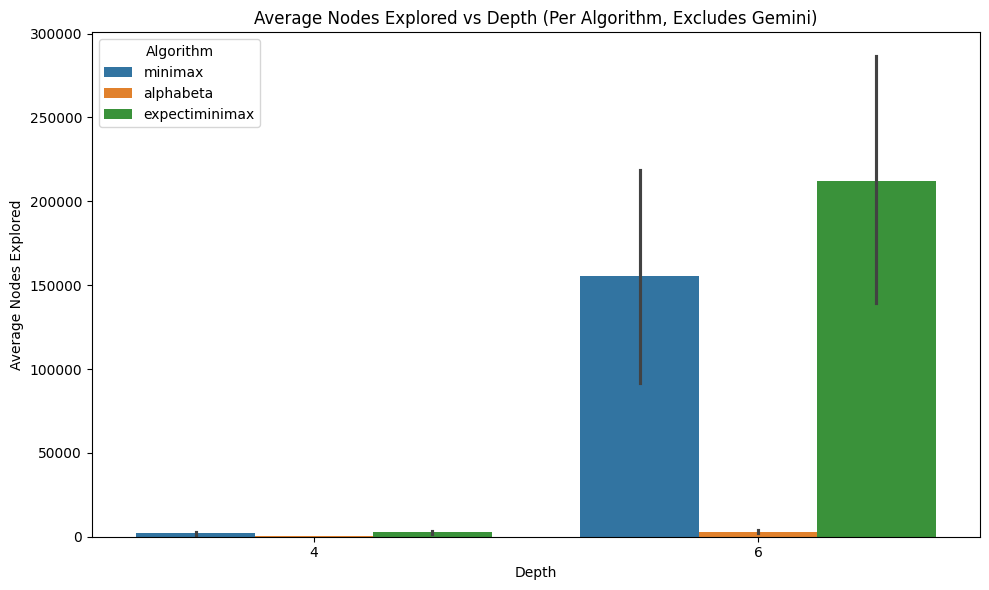

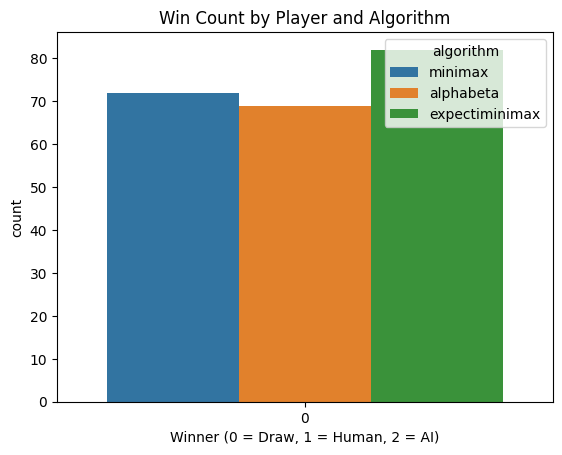

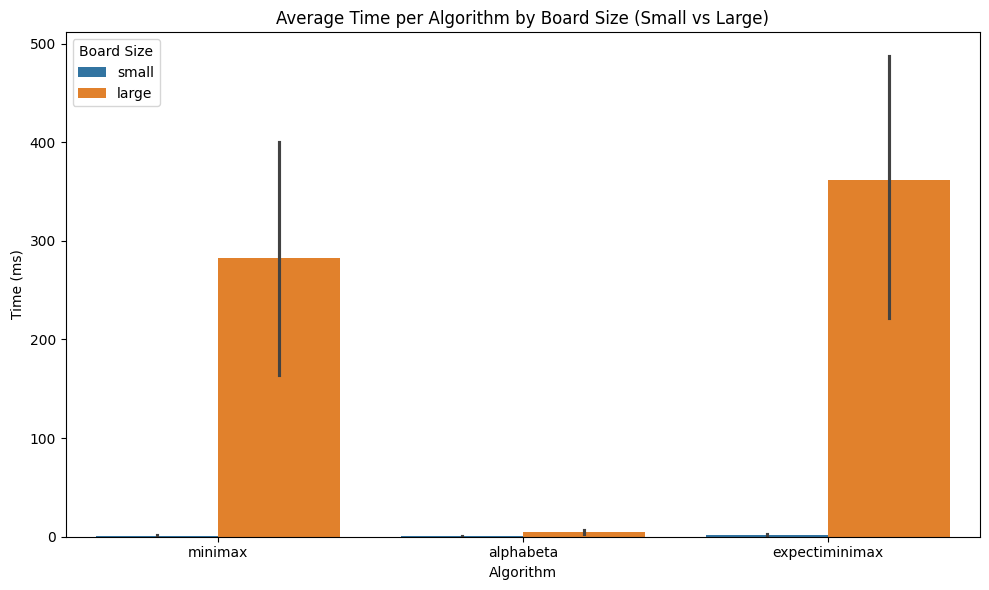

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

csv_path = "evaluation_log.csv"

if not os.path.exists(csv_path):
    print(" CSV not found in visualization folder.")
    exit()

df = pd.read_csv(csv_path)
df['depth'] = df['depth'].astype(str)

# Avg Time per Algorithm
# --- 1. Average Time (without Gemini) ---
df_no_gemini = df[df['algorithm'] != 'gemini']

plt.figure(figsize=(8, 5))
sns.barplot(data=df_no_gemini, x="algorithm", y="timeMs", estimator="mean")
plt.title("Average Time per Algorithm (Excluding Gemini)")
plt.ylabel("Time (ms)")
plt.xlabel("Algorithm")
plt.tight_layout()
plt.show()

# --- 2. Average Time (with Gemini) ---
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="algorithm", y="timeMs", estimator="mean")
plt.title("Average Time per Algorithm (Including Gemini)")
plt.ylabel("Time (ms)")
plt.xlabel("Algorithm")
plt.tight_layout()
plt.show()

# Avg Nodes (excluding Gemini)
sns.barplot(data=df[df['nodes'] > 0], x="algorithm", y="nodes", estimator="mean")
plt.title("Avg Nodes Evaluated (Non-Gemini)")
plt.show()



# time per depth per algorithm wihtout gemini as there is no depths 
df_no_gemini = df[df['algorithm'] != 'gemini'].copy()
df_no_gemini['depth'] = df_no_gemini['depth'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_no_gemini, x="depth", y="timeMs", hue="algorithm", estimator="mean")
plt.title("Avg Time vs Depth per Algorithm")
plt.ylabel("Time (ms)")
plt.xlabel("Depth")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()


df_nodes = df[df['algorithm'] != 'gemini'].copy()
df_nodes = df_nodes[df_nodes['nodes'] > 0]  # Ensure valid data

# Convert depth to string for grouping
df_nodes['depth'] = df_nodes['depth'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_nodes, x="depth", y="nodes", hue="algorithm", estimator="mean")
plt.title("Average Nodes Explored vs Depth (Per Algorithm, Excludes Gemini)")
plt.xlabel("Depth")
plt.ylabel("Average Nodes Explored")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()


# Win Distribution 
# firs removing draws to show only wins and losses
sns.countplot(data=df, x="winner", hue="algorithm")
plt.title("Win Count by Player and Algorithm")
plt.xlabel("Winner (0 = Draw, 1 = Human, 2 = AI)")
plt.show()


# Time per Algorithm by Board Size (Small vs Large)
# Filter out gemini since it doesn't use search trees
df_board_compare = df[df['algorithm'] != 'gemini'].copy()

# Ensure boardSize is string and filter only small or large for clearer comparison
df_board_compare = df_board_compare[df_board_compare['boardSize'].isin(['small', 'large'])]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_board_compare, x='algorithm', y='timeMs', hue='boardSize', estimator='mean')
plt.title("Average Time per Algorithm by Board Size (Small vs Large)")
plt.ylabel("Time (ms)")
plt.xlabel("Algorithm")
plt.legend(title="Board Size")
plt.tight_layout()
plt.show()